In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
folder="https://raw.githubusercontent.com/hh26/EPL-Predictions/master/CSV/"

x_train = pd.read_csv(folder+'XTRAIN2.csv')
y_train = pd.read_csv(folder+'YTRAIN2.csv')
x_test = pd.read_csv(folder+'XTEST2.csv')
y_test = pd.read_csv(folder+'YTEST2.csv')
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

# Linear Kernel

## Class A features alone:

In [61]:
classAfeatures=['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP',
       'HCKPP', 'ACKPP', 'HAttack', 'AAttack', 'HMidField', 'AMidField',
       'HDefence', 'ADefence', 'HOverall', 'AOverall', 'HTGD', 'ATGD',
       'HStWeighted', 'AStWeighted']

In [78]:
x_train_a=x_train[classAfeatures]
x_test_a=x_test[classAfeatures]

In [63]:
SVML=SVC(kernel='linear')
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.5331779331779332
Validation Accuracy: 0.5394474508686984
Testing Accuracy: 0.578125


In [ ]:
#params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20]}
#grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
#grid.fit(x_train_a,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 119.0min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 161.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=5)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


{'C': 1, 'gamma': 0.01}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
grid.best_score_

0.534034034034034

In [74]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
#SVML=grid.best_estimator_
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.4830427674177674
Validation Accuracy: 0.49387638849330673
Testing Accuracy: 0.5546875


RFE

In [79]:
from sklearn.feature_selection import RFE
rfe=RFE(SVML,n_features_to_select=1,step=1)
rfe.fit(x_train_a,y_train)
Ranks=rfe.ranking_

In [80]:
FeatureRanks={}
for i in range(0,len(classAfeatures)):
    FeatureRanks[classAfeatures[i]]=Ranks[i]
FeatureRanks
delfeatures=[]
for key,value in FeatureRanks.items():
    if(value>=15):
        delfeatures.append(key)
    
delfeatures

['ASTKPP',
 'HAttack',
 'AAttack',
 'AMidField',
 'HDefence',
 'ADefence',
 'HTGD',
 'ATGD']

In [81]:
x_train_a.drop(delfeatures, axis = 1, inplace = True)
x_test_a.drop(delfeatures, axis = 1, inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#SVML=grid.best_estimator_
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a,y_test)))

In [82]:
y_pred=SVML.predict(x_test_a)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[182  61  65]
 [ 22 115  37]
 [ 56  44  58]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [83]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.70      0.59      0.64       308
           A       0.52      0.66      0.58       174
           D       0.36      0.37      0.36       158

    accuracy                           0.55       640
   macro avg       0.53      0.54      0.53       640
weighted avg       0.57      0.55      0.56       640



### RPS Score

In [84]:
prob_pred = SVML.predict_proba(x_test_a)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.1831770933111243


In [85]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [86]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


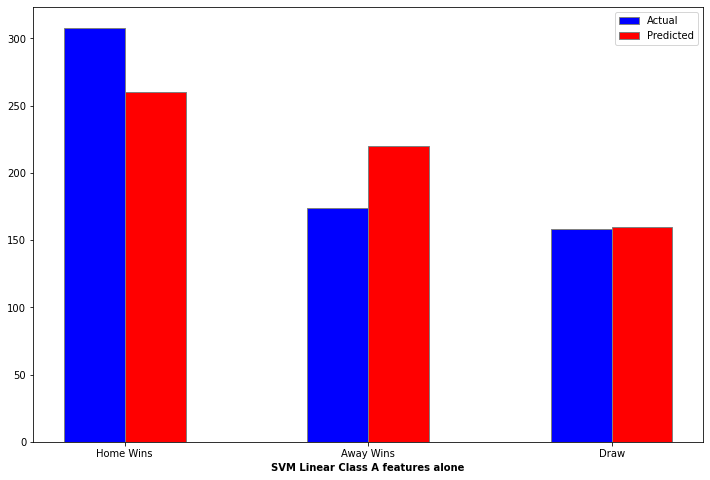

In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('SVM Linear Class A features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()

## Class B features alone:

In [89]:
classBfeatures=['FormDifferential', 'StDifferential',
       'STKPP', 'GKPP', 'CKPP', 'RelAttack', 'RelMidField', 'RelDefence',
       'RelOverall', 'GDDifferential', 'StWeightedDifferential']

In [90]:
x_train_b=x_train[classBfeatures]
x_test_b=x_test[classBfeatures]

In [91]:
x_train_b

,FormDifferential,StDifferential,STKPP,GKPP,CKPP,RelAttack,RelMidField,RelDefence,RelOverall,GDDifferential,StWeightedDifferential
0,1.194542,0.333333,-1.333333,0.333333,-0.500000,3,6,-5,1,5,0.333333
1,2.608709,0.666667,3.666667,1.166667,-0.500000,3,13,8,9,14,0.650794
2,-0.303694,-0.333333,-2.166667,-0.500000,-0.166667,6,3,-2,2,-5,-0.126984
3,0.700445,0.388889,-1.833333,0.500000,1.000000,11,13,14,12,6,0.396825
4,0.529287,0.222222,0.500000,0.000000,-2.666667,10,1,2,4,6,0.079365
...,...,...,...,...,...,...,...,...,...,...,...
3506,-1.820235,-0.500000,-2.833333,-1.666667,-3.166667,0,2,2,0,-30,-0.571429
3507,0.811829,-0.055556,-0.833333,-0.666667,-1.000000,-7,-6,-5,-6,-40,0.158730
3508,-1.234401,-0.222222,0.833333,-0.333333,0.833333,0,0,0,0,4,-0.428571
3509,-0.605933,-0.500000,-3.500000,-1.500000,0.166667,-5,-6,-6,-4,-27,-0.365079


In [16]:
SVML=SVC(kernel='linear', probability = True,gamma='scale',class_weight='balanced')
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class B features alone: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b,y_test)))

Cross Validation Score for Class B features alone: 0.49729425666925664
Validation Accuracy: 0.5064084306465394
Testing Accuracy: 0.5421875


In [8]:
SVML=SVC(kernel='linear', probability = True,class_weight='balanced')
params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20]}
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_b,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 149.6min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 224.3min finished


GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [9]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVC(C=1, class_weight='balanced', gamma=0.01, kernel='linear', probability=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
grid.best_score_

0.5272002278553118

In [92]:
SVML=SVC(C=1, class_weight='balanced', gamma=0.01, kernel='linear', probability=True)

crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class B features alone: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b,y_test)))

Cross Validation Score for Class B features alone: 0.49729425666925664
Validation Accuracy: 0.5064084306465394
Testing Accuracy: 0.5421875


In [9]:
cols1=['StDifferential','RelAttack','RelMidField','RelDefence']
x_train_b.drop(cols1, axis = 1 , inplace = True)
x_test_b.drop(cols1, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_b,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 12.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=True,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=5)

In [33]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'class_weight': None, 'gamma': 0.01}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [10]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class B features alone: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b,y_test)))

Cross Validation Score for Class B features alone: 0.47877735690235684
Validation Accuracy: 0.4978638564511535
Testing Accuracy: 0.5078125


Removing the four columns lowered the accuracy. So, final results considered without removing them. 

In [93]:
y_pred=SVML.predict(x_test_b)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[179  48  81]
 [ 21 111  42]
 [ 58  43  57]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [94]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.69      0.58      0.63       308
           A       0.55      0.64      0.59       174
           D       0.32      0.36      0.34       158

    accuracy                           0.54       640
   macro avg       0.52      0.53      0.52       640
weighted avg       0.56      0.54      0.55       640



### RPS Score

In [95]:
prob_pred = SVML.predict_proba(x_test_b)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.18288553942078806


In [96]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [97]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


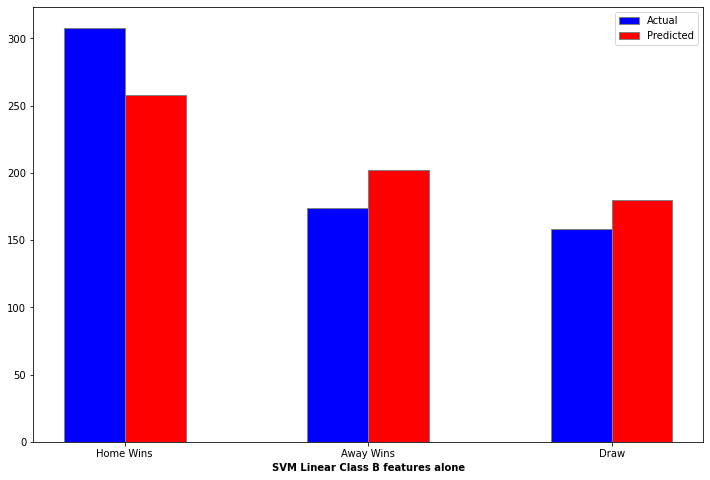

In [98]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('SVM Linear Class B features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()

# RBF Kernel

## Class A features alone:

In [99]:
classAfeatures=['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP',
       'HCKPP', 'ACKPP', 'HAttack', 'AAttack', 'HMidField', 'AMidField',
       'HDefence', 'ADefence', 'HOverall', 'AOverall', 'HTGD', 'ATGD',
       'HStWeighted', 'AStWeighted']

In [100]:
x_train_a_rbf=x_train[classAfeatures]
x_test_a_rbf=x_test[classAfeatures]

In [101]:
x_train_a_rbf

,HForm,AForm,HSt,ASt,HSTKPP,ASTKPP,HGKPP,AGKPP,HCKPP,ACKPP,...,HMidField,AMidField,HDefence,ADefence,HOverall,AOverall,HTGD,ATGD,HStWeighted,AStWeighted
0,1.735889,0.541347,0.611111,0.277778,5.166667,6.500000,1.166667,0.833333,6.000000,6.500000,...,77,71,70,75,75,74,2,-3,0.714286,0.380952
1,3.425197,0.816488,1.000000,0.333333,7.833333,4.166667,2.000000,0.833333,5.666667,6.166667,...,88,75,85,77,87,78,10,-4,1.000000,0.349206
2,0.832549,1.136243,0.277778,0.611111,4.666667,6.833333,0.666667,1.166667,5.500000,5.666667,...,80,77,76,78,80,78,-3,2,0.396825,0.523810
3,0.912100,0.211655,0.444444,0.055556,3.666667,5.500000,1.000000,0.500000,5.000000,4.000000,...,79,66,79,65,80,68,-1,-7,0.492063,0.095238
4,0.994804,0.465517,0.500000,0.277778,5.833333,5.333333,0.833333,0.833333,2.666667,5.333333,...,79,78,76,74,79,75,2,-4,0.365079,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,0.334750,2.154985,0.111111,0.611111,3.000000,5.833333,0.833333,2.500000,3.666667,6.833333,...,78,76,76,74,77,77,-15,15,0.095238,0.666667
3507,1.923311,1.111482,0.555556,0.611111,4.333333,5.166667,1.666667,2.333333,4.333333,5.333333,...,76,82,76,81,76,82,-10,30,0.634921,0.476190
3508,0.133752,1.368153,0.388889,0.611111,4.833333,4.000000,1.333333,1.666667,4.833333,4.000000,...,74,74,74,74,75,75,-10,-14,0.301587,0.730159
3509,0.464721,1.070654,0.111111,0.611111,3.166667,6.666667,0.500000,2.000000,6.833333,6.666667,...,73,79,73,79,75,79,-14,13,0.158730,0.523810


In [102]:
SVML=SVC(kernel='rbf', probability = True)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a_rbf,y_test)))

Cross Validation Score for Class A features: 0.5334628334628333
Validation Accuracy: 0.5334662489319282
Testing Accuracy: 0.5796875


In [26]:
#SVML=SVC(kernel='rbf', probability = True)
#params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20]}
#grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
#grid.fit(x_train_a,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  8.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=5)

In [27]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
grid.best_score_

0.5197949302193108

In [103]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a_rbf,y_test)))

Cross Validation Score for Class A features: 0.46595603470603475
Validation Accuracy: 0.6530902876673312
Testing Accuracy: 0.5


In [104]:
nonGaussianDistcols = ['HAttack', 'AAttack', 'HMidField', 'AMidField','HDefence', 'ADefence']
x_train_a_rbf.drop(nonGaussianDistcols, axis = 1 , inplace = True)
x_test_a_rbf.drop(nonGaussianDistcols, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
#grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
#grid.fit(x_train_a,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  9.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=True,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=5)

In [35]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [105]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_a_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_a_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_a_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_a_rbf,y_test)))

Cross Validation Score for Class A features: 0.4648164335664335
Validation Accuracy: 0.5556821418399317
Testing Accuracy: 0.49375


In [106]:
y_pred=SVML.predict(x_test_a_rbf)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[144  72  92]
 [ 22 120  32]
 [ 44  62  52]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [107]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.69      0.47      0.56       308
           A       0.47      0.69      0.56       174
           D       0.30      0.33      0.31       158

    accuracy                           0.49       640
   macro avg       0.48      0.50      0.48       640
weighted avg       0.53      0.49      0.50       640



### RPS Score

In [108]:
prob_pred = SVML.predict_proba(x_test_a_rbf)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.1917781227210345


In [109]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [110]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


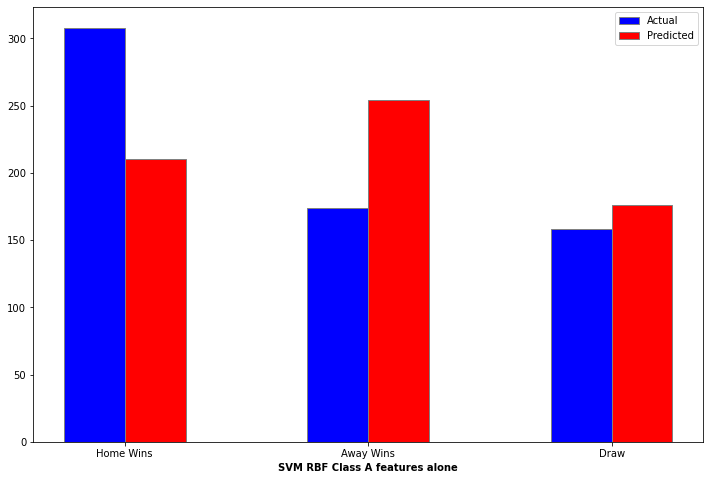

In [111]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('SVM RBF Class A features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()

## Class B features alone:

In [112]:
classBfeatures=['FormDifferential', 'StDifferential',
       'STKPP', 'GKPP', 'CKPP', 'RelAttack', 'RelMidField', 'RelDefence',
       'RelOverall', 'GDDifferential', 'StWeightedDifferential']

In [113]:
x_train_b_rbf=x_train[classBfeatures]
x_test_b_rbf=x_test[classBfeatures]

In [114]:
x_train_b_rbf

,FormDifferential,StDifferential,STKPP,GKPP,CKPP,RelAttack,RelMidField,RelDefence,RelOverall,GDDifferential,StWeightedDifferential
0,1.194542,0.333333,-1.333333,0.333333,-0.500000,3,6,-5,1,5,0.333333
1,2.608709,0.666667,3.666667,1.166667,-0.500000,3,13,8,9,14,0.650794
2,-0.303694,-0.333333,-2.166667,-0.500000,-0.166667,6,3,-2,2,-5,-0.126984
3,0.700445,0.388889,-1.833333,0.500000,1.000000,11,13,14,12,6,0.396825
4,0.529287,0.222222,0.500000,0.000000,-2.666667,10,1,2,4,6,0.079365
...,...,...,...,...,...,...,...,...,...,...,...
3506,-1.820235,-0.500000,-2.833333,-1.666667,-3.166667,0,2,2,0,-30,-0.571429
3507,0.811829,-0.055556,-0.833333,-0.666667,-1.000000,-7,-6,-5,-6,-40,0.158730
3508,-1.234401,-0.222222,0.833333,-0.333333,0.833333,0,0,0,0,4,-0.428571
3509,-0.605933,-0.500000,-3.500000,-1.500000,0.166667,-5,-6,-6,-4,-27,-0.365079


In [42]:
SVML=SVC(kernel='rbf', probability = True)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class B features alone: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b_rbf,y_test)))

Cross Validation Score for Class B features alone: 0.5397298303548305
Validation Accuracy: 0.541726003987468
Testing Accuracy: 0.58125


In [48]:
SVML=SVC(kernel='rbf', probability = True)
params={'C':[1,2,3,4,5,6,7,8,9,10],'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20], 'class_weight':[None,'balanced']}
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='balanced_accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_b_rbf,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 11.0min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             return_train_score=True, scoring='balanced_accuracy', verbose=5)

In [49]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'class_weight': 'balanced', 'gamma': 0.01}
SVC(C=1, class_weight='balanced', gamma=0.01, probability=True)


In [115]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b_rbf,y_test)))

Cross Validation Score for Class A features: 0.4736515799015798
Validation Accuracy: 0.5363144403303902
Testing Accuracy: 0.503125


In [116]:
cols1=['StDifferential','RelAttack','RelMidField','RelDefence']
x_train_b.drop(cols1, axis = 1 , inplace = True)
x_test_b.drop(cols1, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
grid=GridSearchCV(estimator=SVML,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,verbose=5,n_jobs=-1)
grid.fit(x_train_b,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 12.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=True,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=5)

In [33]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'class_weight': None, 'gamma': 0.01}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [117]:
SVML=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
crossvalscores=[]
cvscore=cross_val_score(SVML,x_train_b_rbf,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

SVML.fit(x_train_b_rbf,y_train)
print("Validation Accuracy: "+ str(SVML.score(x_train_b_rbf,y_train)))
print("Testing Accuracy: "+ str(SVML.score(x_test_b_rbf,y_test)))

Cross Validation Score for Class A features: 0.4736515799015798
Validation Accuracy: 0.5363144403303902
Testing Accuracy: 0.503125


In [118]:
y_pred=SVML.predict(x_test_b_rbf)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[144  65  99]
 [ 16 113  45]
 [ 35  58  65]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [119]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.74      0.47      0.57       308
           A       0.48      0.65      0.55       174
           D       0.31      0.41      0.35       158

    accuracy                           0.50       640
   macro avg       0.51      0.51      0.49       640
weighted avg       0.56      0.50      0.51       640



### RPS Score

In [120]:
prob_pred = SVML.predict_proba(x_test_b_rbf)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.19052640948736627


In [121]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [122]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


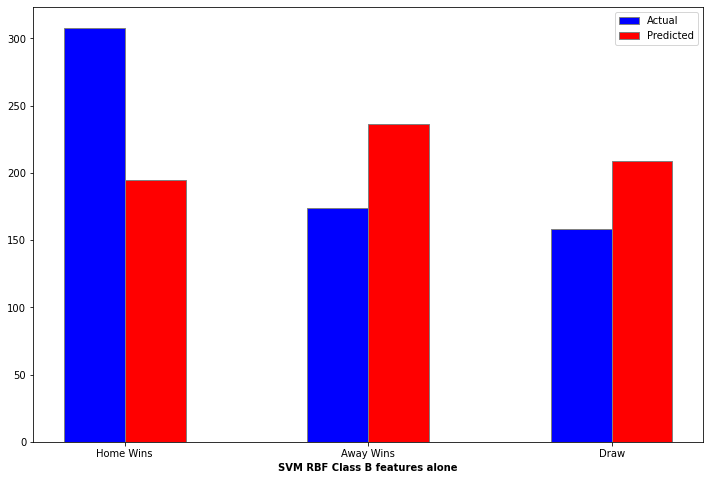

In [123]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('SVM RBF Class B features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()